# Google Data Analytics Capstone Project - Cyclistic bike-share analysis

We will be using jupyter notebook for the prepare, process, and analyze phrase, then we will be using Tableau for additional analysis and share phrase

## Prepare 

In [1]:
# Import all the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

In [2]:
# Define the path to the files
path = r'C:\Users\USER\Data\2023-divvy-tripdata\\'

# List of filenames for each month
filenames = [
    '202301-divvy-tripdata.csv',
    '202302-divvy-tripdata.csv',
    '202303-divvy-tripdata.csv',
    '202304-divvy-tripdata.csv',
    '202305-divvy-tripdata.csv',
    '202306-divvy-tripdata.csv',
    '202307-divvy-tripdata.csv',
    '202308-divvy-tripdata.csv',
    '202309-divvy-tripdata.csv',
    '202310-divvy-tripdata.csv',
    '202311-divvy-tripdata.csv',
    '202312-divvy-tripdata.csv'
]

# Create an empty list to hold the DataFrames
data_frames = []

# Loop through the filenames and read each file into a DataFrame
for filename in filenames:
    file_path = path + filename
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

combined_df


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual
5719873,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual
5719874,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member
5719875,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,41.885492,-87.652289,casual


## Process 

In [3]:
# Inspect the data type
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


In [4]:
# See if there are any missing values
combined_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

In [5]:
# See if there are any duplicate
combined_df.duplicated().sum()

0

In [6]:
# Remove all rows that contain missing values and reset the index
cleaned_df = combined_df.dropna().reset_index(drop=True)
cleaned_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331702,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual
4331703,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual
4331704,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member
4331705,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,41.885492,-87.652289,casual


In [7]:
# Change the datatype of started_at and ended_at to datetime
cleaned_df['started_at'] = pd.to_datetime(cleaned_df['started_at'])
cleaned_df['ended_at'] = pd.to_datetime(cleaned_df['ended_at'])
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4331707 entries, 0 to 4331706
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 429.6+ MB


In [8]:
# We will calculate the duration of each ride by using started_at and ended_at and name it ride_duration_seconds
cleaned_df['ride_duration_seconds'] = (cleaned_df['ended_at'] - cleaned_df['started_at']).dt.total_seconds()
cleaned_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_seconds
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,651.0
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,509.0
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,794.0
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,526.0
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,919.0


In [9]:
# We will create another column using ride_duration_seconds but format it from second to HHMMSS 
cleaned_df['ride_duration'] = cleaned_df['ride_duration_seconds'].apply(lambda x: f"{int(x//3600):02}:{int((x%3600)//60):02}:{int(x%60):02}")
cleaned_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_seconds,ride_duration
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,651.0,00:10:51
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,509.0,00:08:29
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,794.0,00:13:14
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,526.0,00:08:46
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,919.0,00:15:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331702,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual,133.0,00:02:13
4331703,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,215.0,00:03:35
4331704,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,230.0,00:03:50
4331705,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,41.885492,-87.652289,casual,1058.0,00:17:38


In [ ]:
# Next we will calculate the distance of each ride
def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    return geodesic(start_coords, end_coords).km

cleaned_df['ride_distance_km'] = cleaned_df.apply(calculate_distance, axis=1)

In [ ]:
cleaned_df

In [ ]:
cleaned_df.describe()

We can see that there might be some incorrect data as the min of the ride_duration_seconds is in minus

In [ ]:
# We will identify if there are any ride that have a minus duration
negative_duration = (cleaned_df[cleaned_df['ride_duration_seconds'] < 0])
negative_duration

We can see that some observation might be incorrectly input as they are ending the ride before the starting of the ride

In [ ]:
# We will drop all the rows that have minus duration
cleaned_df = cleaned_df[cleaned_df['ride_duration_seconds'] >= 0].copy()
cleaned_df.describe()

In [ ]:
cleaned_df

There are 4331641 rows left after we romoved 66 rows that have minus duration

In [ ]:
# We will inspect the rides that are having the ride distance as 0
zero_distance = (cleaned_df[cleaned_df['ride_distance_km'] == 0])
zero_distance

These rides are most likely to be a round trip as they all have the same start and ending station which make the distance of the ride equal to zero

In [ ]:
# Next, we will create a column to identify whether the ride is a one-way or round trip
def trip_type(row):
    if row['ride_distance_km'] == 0:
        return "Round trip"
    else:
        return "One-way trip"

cleaned_df['ride_type'] = cleaned_df.apply(trip_type, axis = 1)

In [ ]:
cleaned_df

Next, we will create a column called day_of_week and month to stored the day of the week and month of each ride, respectively.

In [ ]:
cleaned_df['day_of_week'] = cleaned_df['started_at'].dt.day_name()
cleaned_df['month'] = cleaned_df['started_at'].dt.month_name()
cleaned_df

We will also create a season column by using the month column

(Please note that the underlying data was collected from the US, Chicago to be specific)

In [ ]:
month_to_season = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring', 'April': 'Spring',
    'May': 'Spring', 'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Fall', 'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
}

cleaned_df['season'] = cleaned_df['month'].map(month_to_season)
cleaned_df

We will also create a start hour column then use it to categorized each ride into part of the days.

In [ ]:
# Extract hour from 'started_at'
cleaned_df['start_hour'] = cleaned_df['started_at'].dt.hour

# Categorized each rides into part of the days
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

cleaned_df['part_of_the_day'] = cleaned_df['start_hour'].apply(categorize_time)
cleaned_df

We will rearrange the column to make it more organize

In [ ]:
new_columns = [
    'ride_id', 'member_casual', 'rideable_type', 'started_at', 'ended_at', 'day_of_week', 'month', 'season',
    'start_hour', 'part_of_the_day', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id',
    'start_lat', 'start_lng', 'end_lat', 'end_lng', 'ride_duration', 'ride_duration_seconds', 'ride_distance_km', 
    'ride_type'
]

comp_df = cleaned_df.reindex(columns = new_columns)
comp_df

In [ ]:
comp_df[user_type] = comp_df[member_casual]

## Analyze 

In [23]:
comp_df.describe()

,start_hour,start_lat,start_lng,end_lat,end_lng,ride_duration_seconds,ride_distance_km
count,4.331641e+06,4.331641e+06,4.331641e+06,4.331641e+06,4.331641e+06,4.331641e+06,4.331641e+06
mean,1.405611e+01,4.190095e+01,-8.764466e+01,4.190137e+01,-8.764487e+01,9.571449e+02,2.064656e+00
std,4.862318e+00,4.301377e-02,2.490089e-02,5.549559e-02,7.712052e-02,2.165224e+03,8.373953e+00
min,0.000000e+00,4.164850e+01,-8.784409e+01,0.000000e+00,-8.784406e+01,0.000000e+00,0.000000e+00
25%,1.100000e+01,4.188090e+01,-8.765766e+01,4.188096e+01,-8.765842e+01,3.370000e+02,8.653234e-01
50%,1.500000e+01,4.189636e+01,-8.764170e+01,4.189662e+01,-8.764182e+01,5.880000e+02,1.521886e+00
75%,1.800000e+01,4.192677e+01,-8.762858e+01,4.192877e+01,-8.762858e+01,1.049000e+03,2.674941e+00
max,2.300000e+01,4.206487e+01,-8.752823e+01,4.206485e+01,0.000000e+00,7.281780e+05,9.818680e+03


In [24]:
# We will calculate the amount of ride by each type of member
member_casual_counts = comp_df['member_casual'].value_counts()
member_casual_counts 

member    2799920
casual    1531721
Name: member_casual, dtype: int64

In [25]:
# We will calculate the amount of ride by each type of member as a percentage
member_casual_percentage = (((comp_df['member_casual'].value_counts())/len(comp_df))*100).round(2)
member_casual_percentage.columns = ['member_casual', 'percentage']
member_casual_percentage

member    64.64
casual    35.36
Name: member_casual, dtype: float64

There are a total of 4,331,641 ride in this data.

2,799,920 of them are member user and 1,531,721 rides are casual user which is equivalent to 64.64% and 35.36%, respectively. 

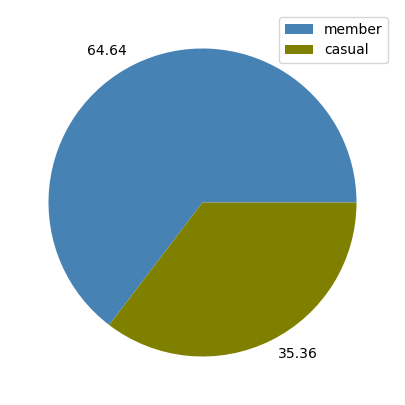

In [26]:
plt.figure(figsize=(7, 5))
plt.pie(member_casual_percentage, labels=member_casual_percentage, colors=['steelblue', 'olive'])
plt.legend(['member', 'casual'])
plt.show()

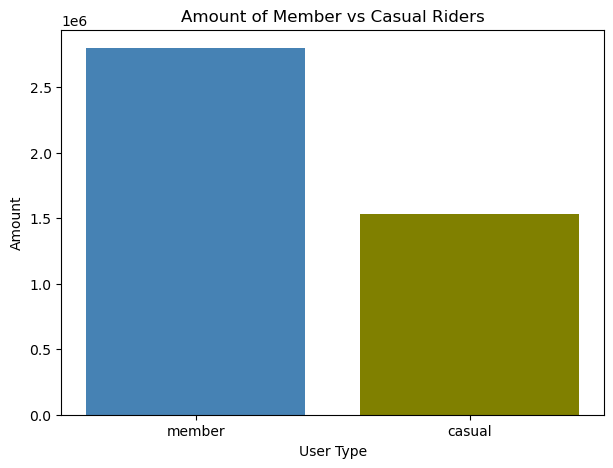

In [27]:
plt.figure(figsize=(7, 5))
plt.bar(member_casual_counts.index, member_casual_counts, color=['steelblue', 'olive'])
plt.title('Amount of Member vs Casual Riders')
plt.xlabel('User Type')
plt.ylabel('Amount')
plt.show()

In [28]:
# We will calculate the amount of ride by each type of bike
bike_type = comp_df['rideable_type'].value_counts()
bike_type

classic_bike     2690707
electric_bike    1564810
docked_bike        76124
Name: rideable_type, dtype: int64

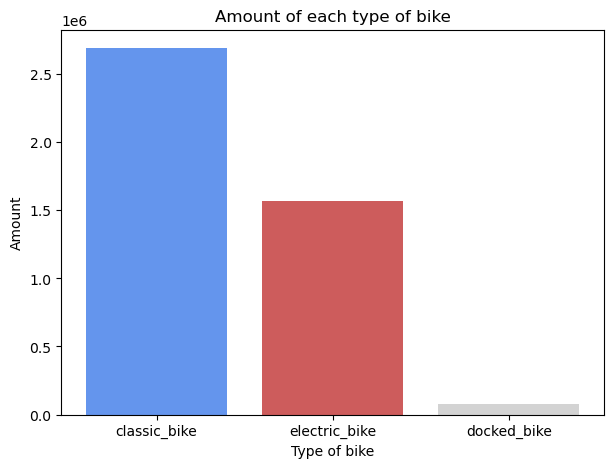

In [88]:
plt.figure(figsize=(7, 5))
plt.bar(bike_type.index, bike_type, color=['cornflowerblue', 'indianred', 'lightgray'])
plt.title('Amount of ride by each type of bike')
plt.xlabel('Type of bike')
plt.ylabel('Amount')
plt.show()

There are three types of bikes: classic, electric, and docked. Generally, user prefer to use classic bike.

In [30]:
# We will see if there are any preference for the type of bike by each type of user 
bike_preferences = comp_df.groupby(['member_casual', 'rideable_type']).size().unstack().fillna(0)
bike_preferences

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,873005.0,76124.0,582592.0
member,1817702.0,0.0,982218.0


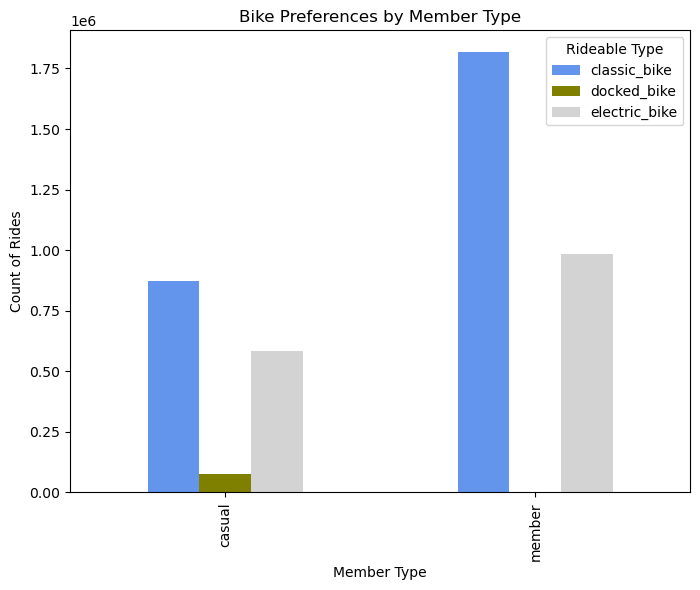

In [31]:
bike_preferences.plot(kind='bar', figsize=(8, 6), color=['cornflowerblue', 'olive', 'lightgray'])
plt.title('Bike Preferences by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Count of Rides')
plt.legend(title='Rideable Type')
plt.show()

We can see from the data that casual users prefer to use classic bikes, electric bikes, and docked bikes, respectively. In contrast, member users prefer only classic and electric bikes, with classic bikes being the most preferred.

In [32]:
# Next, we will calculate the proportion of the ride type between member and casual users
ride_type_counts = comp_df.groupby(['member_casual', 'ride_type']).size().unstack()
ride_type_counts

ride_type,One-way trip,Round trip
member_casual,,
casual,1428157,103564
member,2723635,76285


We can see from the data that both types of users primarily use the bikes for one-way trips. However, casual riders use the bikes for round trips more often than member riders.

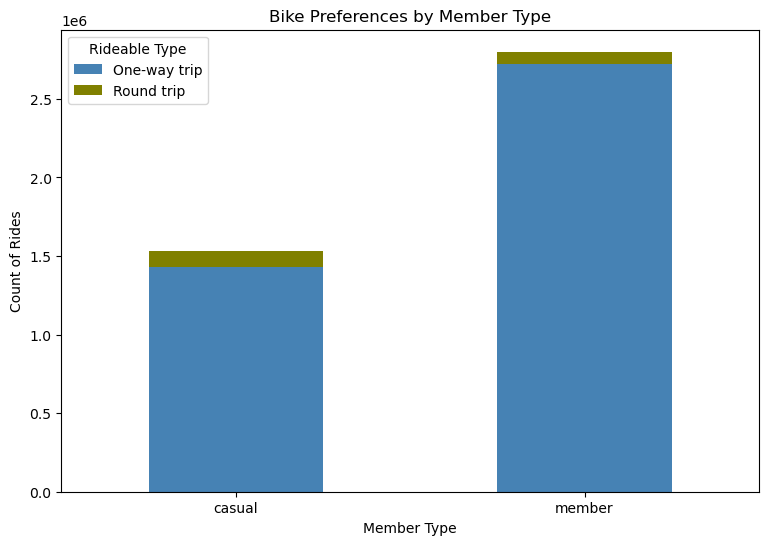

In [33]:
ride_type_counts.plot(kind='bar', stacked=True, figsize=(9, 6), color=['steelblue', 'olive'])
plt.title('Bike Preferences by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Count of Rides')
plt.xticks(rotation=0)
plt.legend(title='Rideable Type')
plt.show()

In [34]:
#Calculate average ride distance for each type of member by using ride_distance_km
avg_ride_distance = comp_df.groupby('member_casual')['ride_distance_km'].mean()
avg_ride_distance

member_casual
casual    2.113848
member    2.037745
Name: ride_distance_km, dtype: float64

In [35]:
# Calculate the average ride duration for each type of member by using ride_duration_seconds and format it into minutes
avg_ride_duration = comp_df.groupby('member_casual')['ride_duration_seconds'].mean()
avg_ride_duration = avg_ride_duration/60
avg_ride_duration

member_casual
casual    22.937337
member    12.131253
Name: ride_duration_seconds, dtype: float64

The data shows that member users travel shorter distances and for shorter durations on average than casual users.

In [77]:
# Next, we are going to calculate the amount of ride in each season and month
ride_by_season = comp_df.groupby(['season','month']).size().reset_index(name='ride_count')

# Calculate the total ride of each season and concat
sum_by_season = ride_by_season.groupby('season')['ride_count'].sum().reset_index()
sum_by_season['month'] = 'Total'
ride_by_season = pd.concat([ride_by_season, sum_by_season], ignore_index=True)
ride_by_season = ride_by_season.sort_values(['season', 'month'])
ride_by_season.set_index(['season', 'month'], inplace=True)
ride_by_season

ride_count
season month                
Fall   November       274766
       October        403775
       September      506632
       Total         1185173
Spring April          324194
       March          200447
       May            463222
       Total          987863
Summer August         584912
       July           573955
       June           534755
       Total         1693622
Winter December       167139
       February       149560
       January        148284
       Total          464983

The highest amount of rides occurs in the summer, with August having the highest number of rides both within the season and compared to any other month. While winter have the lowest amount of rides.

In [82]:
# We will calculate the ride in each day of week and also determine whether it's weekday or weekend
def classify_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'
    
rides_by_day = comp_df.groupby('day_of_week').size().reset_index(name='ride_count')
rides_by_day['day_type'] = rides_by_day['day_of_week'].apply(classify_day)

# We will also calculate the total of each type of day and then concat it to the bottom row of each type of day
sum_by_day_type = rides_by_day.groupby('day_type')['ride_count'].sum().reset_index()
sum_by_day_type['day_of_week'] = 'Total'
rides_by_day = pd.concat([rides_by_day, sum_by_day_type], ignore_index = True)

# Arrange the day into the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_by_day['day_of_week'] = pd.Categorical(rides_by_day['day_of_week'], categories = day_order + ['Total'], ordered = True)
rides_by_day = rides_by_day.sort_values(['day_type', 'day_of_week'])
rides_by_day.set_index(['day_type', 'day_of_week'], inplace = True)
rides_by_day

ride_count
day_type day_of_week            
Weekday  Monday           562095
         Tuesday          630384
         Wednesday        635808
         Thursday         651583
         Friday           628372
         Total           3108242
Weekend  Saturday         660802
         Sunday           562597
         Total           1223399

Generally, users ride more on weekdays than on weekends. The highest number of rides on a weekday is on Wednesday, while on a weekend it is on Saturday.

In [87]:
# Calculate the amount of ride in each part of the day
ride_in_part_of_day = comp_df.groupby('part_of_the_day').size().reset_index(name='ride_count')
part_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
ride_in_part_of_day['part_of_the_day'] = pd.Categorical(ride_in_part_of_day['part_of_the_day'], categories=part_of_day_order, ordered=True)
ride_in_part_of_day = ride_in_part_of_day.sort_values('part_of_the_day')
ride_in_part_of_day.set_index(['part_of_the_day', 'ride_count'], inplace = True)
ride_in_part_of_day

,
part_of_the_day,ride_count
Morning,1167310
Afternoon,1475538
Evening,1251331
Night,437462


The highest number of rides occurs in the afternoon, while the lowest is at night.

We will extract the data that has been processed as a CSV file so we can use it to perform further analysis and for the share phrase in Tableau.

In [89]:
comp_df.to_csv(r'C:\Users\USER\Data\2023-divvy-tripdata\\processed_tripdata.csv', index=False)

In [83]:
ex_of_processed_data = comp_df.iloc[:1000000,:]
ex_of_processed_data

,ride_id,member_casual,rideable_type,started_at,ended_at,day_of_week,month,season,start_hour,part_of_the_day,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,ride_duration,ride_duration_seconds,ride_distance_km,ride_type
0,F96D5A74A3E41399,member,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Saturday,January,Winter,20,Evening,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,00:10:51,651.0,0.839313,One-way trip
1,13CB7EB698CEDB88,member,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Tuesday,January,Winter,15,Afternoon,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,00:08:29,509.0,1.203674,One-way trip
2,BD88A2E670661CE5,casual,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Monday,January,Winter,7,Morning,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,00:13:14,794.0,3.540392,One-way trip
3,C90792D034FED968,member,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Sunday,January,Winter,10,Morning,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,00:08:46,526.0,1.203674,One-way trip
4,3397017529188E8A,member,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Thursday,January,Winter,13,Afternoon,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,00:15:19,919.0,1.203674,One-way trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999999,9FC6AB17FFBA08A6,casual,classic_bike,2023-05-30 16:03:41,2023-05-30 16:16:09,Tuesday,May,Spring,16,Afternoon,Southport Ave & Roscoe St,13071,Clark St & Wellington Ave,TA1307000136,41.943739,-87.664020,41.936497,-87.647539,00:12:28,748.0,1.585916,One-way trip
1000000,E95FE160333B3CCF,member,classic_bike,2023-05-03 15:22:32,2023-05-03 15:25:29,Wednesday,May,Spring,15,Afternoon,Loomis St & Jackson Blvd,13206,Aberdeen St & Jackson Blvd,13157,41.877945,-87.662007,41.877726,-87.654787,00:02:57,177.0,0.599782,One-way trip
1000001,4A17AD4DED98BD59,member,classic_bike,2023-05-10 19:29:01,2023-05-10 19:46:18,Wednesday,May,Spring,19,Evening,Loomis St & Jackson Blvd,13206,Aberdeen St & Jackson Blvd,13157,41.877945,-87.662007,41.877726,-87.654787,00:17:17,1037.0,0.599782,One-way trip
1000002,86A41E3EA3CC93BA,member,classic_bike,2023-05-22 18:41:01,2023-05-22 18:44:38,Monday,May,Spring,18,Evening,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Montrose Ave,TA1307000107,41.957867,-87.649505,41.961670,-87.654640,00:03:37,217.0,0.599742,One-way trip


In [84]:
ex_of_processed_data.to_csv(r'C:\Users\USER\Data\2023-divvy-tripdata\\ex_of_processed_data.csv', index=False)